<a href="https://www.kaggle.com/code/hodanaz/crime-analysis-usa?scriptVersionId=178796895" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-rates/report.csv


In [2]:
#import relevant libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


# Crime Analysis of the USA (1975-2015)

# Objective:
* To gather observations on relationship between variables in the dataset.

# Introduction

The FBI defines four major crimes as violent:

* Homicide
* Rape
* Robbery
* Assault


The Marshall Project gathered and examined more than 40 years' worth of data on these crimes in 68 police jurisdictions with populations of at least 250,000 people. It got reports from 61 of them directly from 2015, which the FBI had not yet made public. Based on the FBI's projected population for that year, the crime rate was computed for each category as well as for all violent crimes, per 100,000 people in the jurisdiction. The anticipated population for 2014 was used to determine the per capita crime rate for 2015.


The focus of this analysis was conducted focusing on raw numbers instead of per_capita number, because every person affected matters. Even 1 person out of 1 million affected should be protected by the law even if the per capita numbers are low, doesn’t necessarily mean there’s no scope for improvement. In the same way, high numbers of crime in highly populated areas with low capita calculation must acknowledge the severity of the situation. Taking insights from the Jurisdictions(Law Agencies) which has worked hard over the years to reduce the number of crimes committed can be an enlighting example for other regions to follow and guide them to better reduce the number of crimes.

> (content above taken from @sirazsium's notebook titled *Crimes in America*)

In [3]:
#read data
crime_data = pd.read_csv('/kaggle/input/crime-rates/report.csv')

crime_data.tail(10)

report_year agency_code agency_jurisdiction  population  violent_crimes  \
2819         2015     WASPD00         Seattle, WA    683700.0          4093.0   
2820         2015     MOSPD00       St. Louis, MO    317095.0          5762.0   
2821         2015     NY05101  Suffolk County, NY   1341453.0          1675.0   
2822         2015     FL02902           Tampa, FL    364383.0          2298.0   
2823         2015     AZ01003          Tucson, AZ    529675.0          3472.0   
2824         2015     OK07205           Tulsa, OK    401520.0          3628.0   
2825         2015     VA12800  Virginia Beach, VA    452797.0           626.0   
2826         2015     DCMPD00      Washington, DC    672228.0          8084.0   
2827         2015     KS08703         Wichita, KS    389824.0          3839.0   
2828         2015         NaN       United States         NaN       1197704.0   

      homicides  rapes  assaults  robberies  months_reported  \
2819       23.0  144.0    2394.0     1532.0              NaN   
2820      188.0  263.0    3521.0     1790.0              NaN   
2821       24.0   79.0     895.0      677.0              NaN   
2822       34.0   77.0    1516.0      671.0              NaN   
2823       31.0  422.0    1960.0     1059.0              NaN   
2824       55.0  365.0    2354.0      854.0              NaN   
2825       19.0  103.0     234.0      270.0              NaN   
2826      162.0  494.0    4024.0     3404.0              NaN   
2827       27.0  349.0    2730.0      733.0              NaN   
2828    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
2819            598.65                 3.36            21.06   
2820           1817.12                59.29            82.94   
2821            124.86                 1.79             5.89   
2822            630.66                 9.33            21.13   
2823            655.50                 5.85            79.67   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   
2828            372.60                 4.90              NaN   

      assaults_percapita  robberies_percapita  
2819              350.15               224.07  
2820             1110.39               564.50  
2821               66.72                50.47  
2822              416.05               184.15  
2823              370.04               199.93  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  
2828                 NaN                  NaN

Nan values show up

In [4]:
#get dimensions of the data
print('The number of rows and columns, respectively: ',
      crime_data.shape)

The number of rows and columns, respectively:  (2829, 15)


In [5]:
#have a look at the data types and number of null values
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

Nothing funny in the data types. We proceed.

In [6]:
#statistical summary of the numerical datatypes
crime_data.describe().T

count           mean           std        min  \
report_year          2829.0    1995.000000  1.183425e+01    1975.00   
population           2760.0  795698.089130  1.012451e+06  100763.00   
violent_crimes       2794.0   29632.545097  1.728630e+05     154.00   
homicides            2795.0     398.385331  2.281276e+03       1.00   
rapes                2754.0     416.278867  4.798119e+02      15.00   
assaults             2753.0    4405.146023  6.977294e+03      15.00   
robberies            2754.0    4000.245098  8.653903e+03      83.00   
months_reported      2692.0      11.868871  1.118194e+00       0.00   
crimes_percapita     2794.0    1093.049810  6.768847e+02      16.49   
homicides_percapita  2795.0      15.372812  1.235064e+01       0.21   
rapes_percapita      2754.0      59.305167  3.197157e+01       1.64   
assaults_percapita   2753.0     566.595434  3.694370e+02       1.61   
robberies_percapita  2754.0     459.968112  3.409035e+02      11.46   

                             25%        50%          75%         max  
report_year            1985.0000    1995.00    2005.0000     2015.00  
population           377931.0000  536614.50  816855.7500  8550861.00  
violent_crimes         3014.7500    5135.50    9058.5000  1932274.00  
homicides                32.0000      64.00     131.0000    24703.00  
rapes                   176.2500     291.00     465.0000     3899.00  
assaults               1467.0000    2597.00    4556.0000    71030.00  
robberies              1032.0000    1940.00    3609.7500   107475.00  
months_reported          12.0000      12.00      12.0000       12.00  
crimes_percapita        625.0825     949.68    1409.5075     4352.83  
homicides_percapita       6.9550      11.98      20.2300       94.74  
rapes_percapita          35.7750      55.90      77.7975      199.30  
assaults_percapita      319.0900     487.48     728.2400     2368.22  
robberies_percapita     210.2425     374.40     612.0050     2337.52

In [7]:
#statistical summary of the non-numeric types
crime_data.describe(exclude=np.number).T

count unique              top freq
agency_code          2788     68          NM00101   41
agency_jurisdiction  2829     69  Albuquerque, NM   41

# Data Cleaning

Let's check for missing values and deal with them. Begin by visualizing missing values using the `missingno` package.

<Axes: >

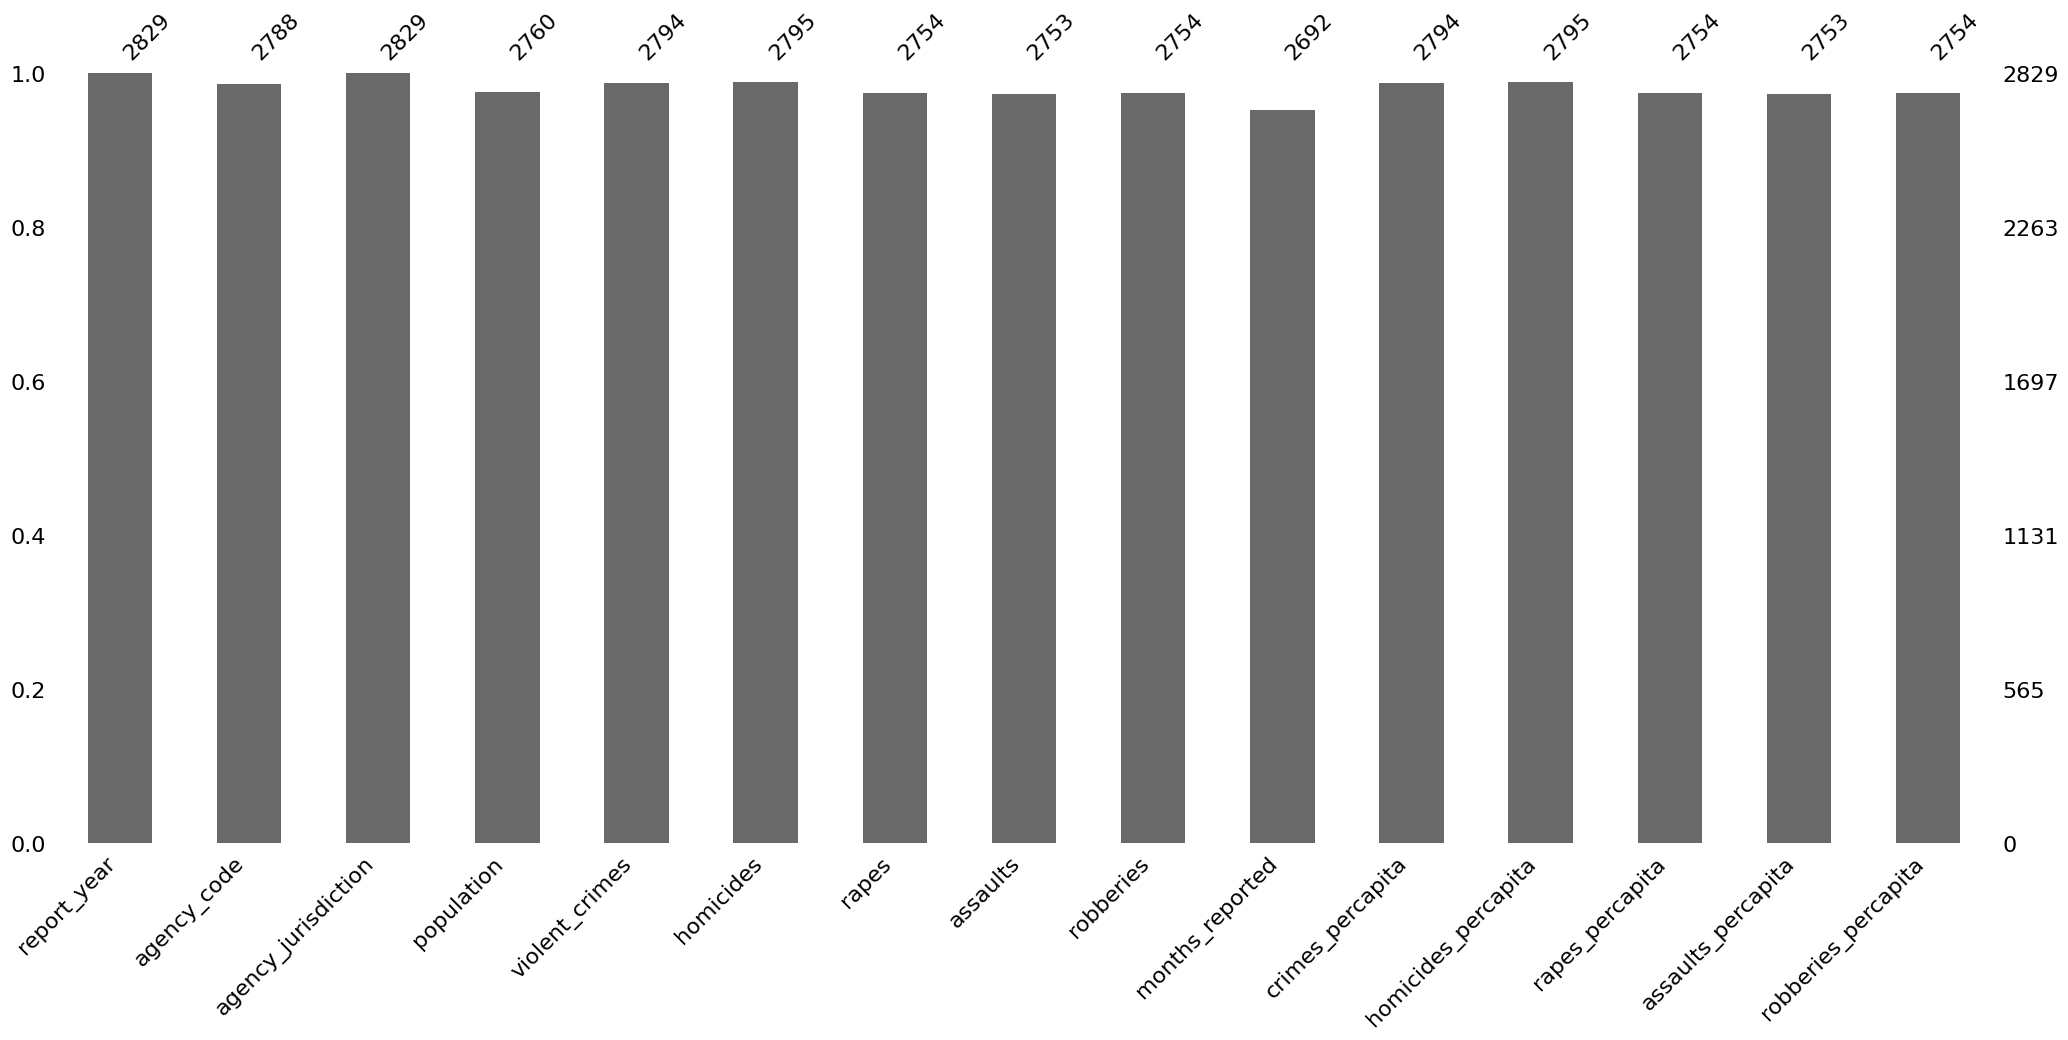

In [8]:
msno.bar(crime_data)

There aren't any columns with extremely sparse non null values which makes things easy for us. Let's look at the specific number of null values in each column.

In [9]:
crime_data.isnull().sum().sort_values(ascending=False)

months_reported        137
assaults                76
assaults_percapita      76
rapes                   75
robberies               75
rapes_percapita         75
robberies_percapita     75
population              69
agency_code             41
violent_crimes          35
crimes_percapita        35
homicides               34
homicides_percapita     34
report_year              0
agency_jurisdiction      0
dtype: int64

Interesting thing to note: the data on types of crime that are missing from the dataset almost occur together. This gives us a succint way to deal with the null values. Let's check for the following--

if there is data in other columns of the rows who have most of their crime related data missing altogether, we'll drop those rows.

What kind of crime analysis can we perform on rows with missing data on the crime itself?

In [10]:
crime_data[crime_data['assaults'].isnull()]

report_year agency_code   agency_jurisdiction  population  \
30           1975     KY05680        Louisville, KY         NaN   
68           1975         NaN         United States         NaN   
99           1976     KY05680        Louisville, KY         NaN   
137          1976         NaN         United States         NaN   
168          1977     KY05680        Louisville, KY         NaN   
...           ...         ...                   ...         ...   
2759         2014         NaN         United States         NaN   
2765         2015     MD00301  Baltimore County, MD    828871.0   
2772         2015     OHCLP00         Cleveland, OH    388655.0   
2810         2015     OR02602          Portland, OR    615672.0   
2828         2015         NaN         United States         NaN   

      violent_crimes  homicides  rapes  assaults  robberies  months_reported  \
30               NaN        NaN    NaN       NaN        NaN              NaN   
68         1039710.0    20510.0    NaN       NaN        NaN              NaN   
99               NaN        NaN    NaN       NaN        NaN              NaN   
137        1004210.0    18780.0    NaN       NaN        NaN              NaN   
168              NaN        NaN    NaN       NaN        NaN              NaN   
...              ...        ...    ...       ...        ...              ...   
2759       1153022.0    14164.0    NaN       NaN        NaN              NaN   
2765             NaN        NaN    NaN       NaN        NaN              NaN   
2772             NaN        NaN    NaN       NaN        NaN              NaN   
2810             NaN        NaN    NaN       NaN        NaN              NaN   
2828       1197704.0    15696.0    NaN       NaN        NaN              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
30                 NaN                  NaN              NaN   
68               487.8                  9.6              NaN   
99                 NaN                  NaN              NaN   
137              467.8                  8.7              NaN   
168                NaN                  NaN              NaN   
...                ...                  ...              ...   
2759             361.6                  4.4              NaN   
2765               NaN                  NaN              NaN   
2772               NaN                  NaN              NaN   
2810               NaN                  NaN              NaN   
2828             372.6                  4.9              NaN   

      assaults_percapita  robberies_percapita  
30                   NaN                  NaN  
68                   NaN                  NaN  
99                   NaN                  NaN  
137                  NaN                  NaN  
168                  NaN                  NaN  
...                  ...                  ...  
2759                 NaN                  NaN  
2765                 NaN                  NaN  
2772                 NaN                  NaN  
2810                 NaN                  NaN  
2828                 NaN                  NaN  

[76 rows x 15 columns]

we can almost see that pattern which we mentioned above that had the possibility of occuring.

Let's go ahead and use the dropna fucntion with the parameter `how` = 'all' to ensure that the rows that have all the rows mentioned in the subset as null are deleted. 

In [11]:
crime_data.dropna(subset=['assaults','assaults_percapita','rapes','rapes_percapita','robberies_percapita','robberies'], how='all',inplace=True)

Let's see how that has worked

In [12]:
crime_data.isnull().sum().sort_values(ascending=False)

months_reported        65
violent_crimes          1
assaults                1
crimes_percapita        1
assaults_percapita      1
report_year             0
agency_code             0
agency_jurisdiction     0
population              0
homicides               0
rapes                   0
robberies               0
homicides_percapita     0
rapes_percapita         0
robberies_percapita     0
dtype: int64

onto the `months_reported` column

In [13]:
crime_data[crime_data['months_reported'].isnull()]

report_year agency_code agency_jurisdiction  population  violent_crimes  \
2760         2015     NM00101     Albuquerque, NM    559721.0          5406.0   
2761         2015     TX22001       Arlington, TX    387565.0          1946.0   
2762         2015     GAAPD00         Atlanta, GA    464710.0          5203.0   
2763         2015     CO00101          Aurora, CO    360237.0          1660.0   
2764         2015     TX22701          Austin, TX    938728.0          3497.0   
...           ...         ...                 ...         ...             ...   
2823         2015     AZ01003          Tucson, AZ    529675.0          3472.0   
2824         2015     OK07205           Tulsa, OK    401520.0          3628.0   
2825         2015     VA12800  Virginia Beach, VA    452797.0           626.0   
2826         2015     DCMPD00      Washington, DC    672228.0          8084.0   
2827         2015     KS08703         Wichita, KS    389824.0          3839.0   

      homicides  rapes  assaults  robberies  months_reported  \
2760       43.0  404.0    3273.0     1686.0              NaN   
2761        8.0  208.0    1201.0      529.0              NaN   
2762       94.0  170.0    2944.0     1995.0              NaN   
2763       24.0  352.0     837.0      447.0              NaN   
2764       23.0  487.0    2058.0      929.0              NaN   
...         ...    ...       ...        ...              ...   
2823       31.0  422.0    1960.0     1059.0              NaN   
2824       55.0  365.0    2354.0      854.0              NaN   
2825       19.0  103.0     234.0      270.0              NaN   
2826      162.0  494.0    4024.0     3404.0              NaN   
2827       27.0  349.0    2730.0      733.0              NaN   

      crimes_percapita  homicides_percapita  rapes_percapita  \
2760            965.84                 7.68            72.18   
2761            502.11                 2.06            53.67   
2762           1119.62                20.23            36.58   
2763            460.81                 6.66            97.71   
2764            372.53                 2.45            51.88   
...                ...                  ...              ...   
2823            655.50                 5.85            79.67   
2824            903.57                13.70            90.90   
2825            138.25                 4.20            22.75   
2826           1202.57                24.10            73.49   
2827            984.80                 6.93            89.53   

      assaults_percapita  robberies_percapita  
2760              584.76               301.22  
2761              309.88               136.49  
2762              633.51               429.30  
2763              232.35               124.08  
2764              219.23                98.96  
...                  ...                  ...  
2823              370.04               199.93  
2824              586.27               212.69  
2825               51.68                59.63  
2826              598.61               506.38  
2827              700.32               188.03  

[65 rows x 15 columns]

We see that the Nan values in `months_reported` is only unique to that column. so instead of removing the 65 rows, let's replace it with a "Not Available". We need all that precious crime data.

In [14]:
crime_data['months_reported'] = crime_data['months_reported'].fillna("Not Available")

In [15]:
crime_data.isnull().sum().sort_values(ascending=False)

violent_crimes         1
assaults               1
crimes_percapita       1
assaults_percapita     1
report_year            0
agency_code            0
agency_jurisdiction    0
population             0
homicides              0
rapes                  0
robberies              0
months_reported        0
homicides_percapita    0
rapes_percapita        0
robberies_percapita    0
dtype: int64

In [16]:
crime_data[crime_data['assaults'].isnull()]

report_year agency_code agency_jurisdiction  population  violent_crimes  \
921         1988     FL01602    Jacksonville, FL    645024.0             NaN   

     homicides  rapes  assaults  robberies months_reported  crimes_percapita  \
921      187.0  573.0       NaN     4299.0             0.0               NaN   

     homicides_percapita  rapes_percapita  assaults_percapita  \
921                28.99            88.83                 NaN   

     robberies_percapita  
921               666.49

good for us, all the single NaN values are from the same row. let's just lose this one.

In [17]:
crime_data.dropna(axis=0, inplace=True)

finally, let's work on the analysis now.

This would be helpful in the case of narrowing into our analysis. we'll do this step and drop the `agency_jurisdiction` and the `agency_code` columns.

In [18]:
#separate the agnecy jurdisdiction column 
#into city and state to get relevant information

crime_data[['city','state']] = crime_data['agency_jurisdiction'] \
.str.split(',', expand=True)

#use expand = True to get separate columns out of the splitted pieces.

In [19]:
#drop the agnecy jursidiction and agency code column because we've 
#already extracted the relevant information from it
crime_data.drop(['agency_jurisdiction','agency_code'], axis=1, inplace=True)

# Data Analysis

## Overview of Relationships in the dataset

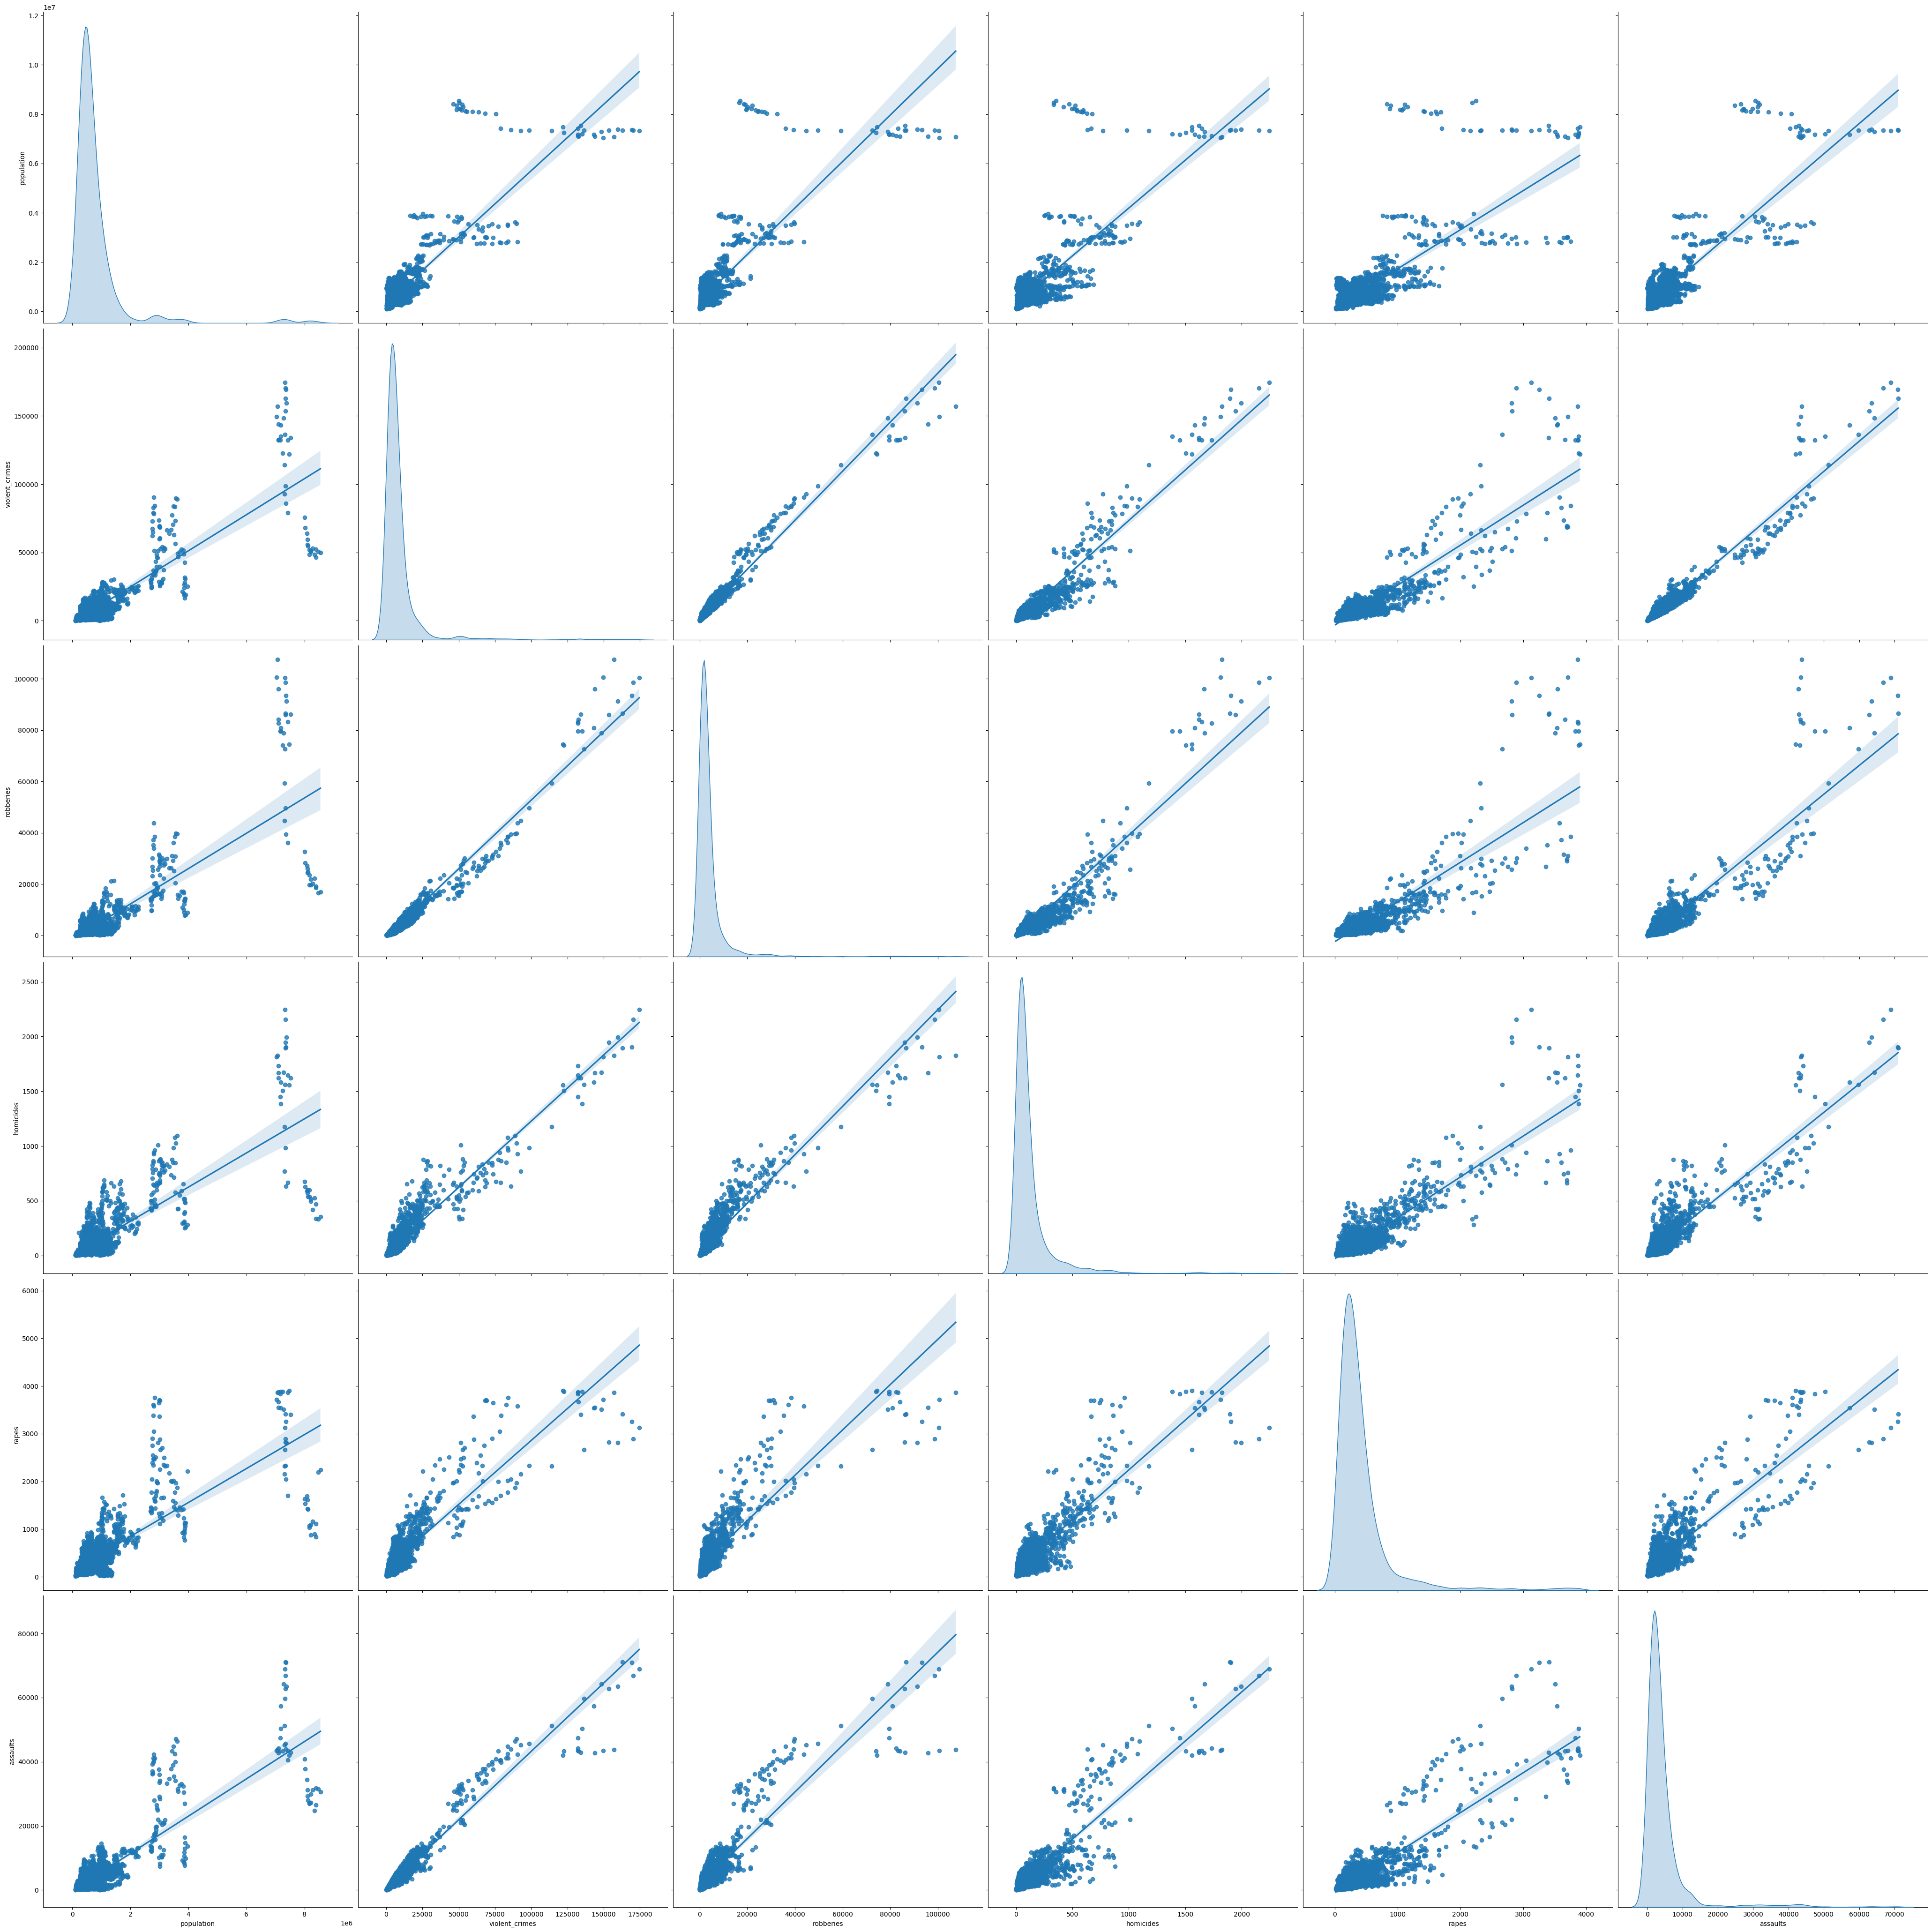

In [20]:
subset_data1 = crime_data[['population','violent_crimes', 'robberies', 'homicides', 'rapes', 'assaults']]
sns.pairplot(subset_data1, height=7, kind='reg', diag_kind='kde')
plt.show()

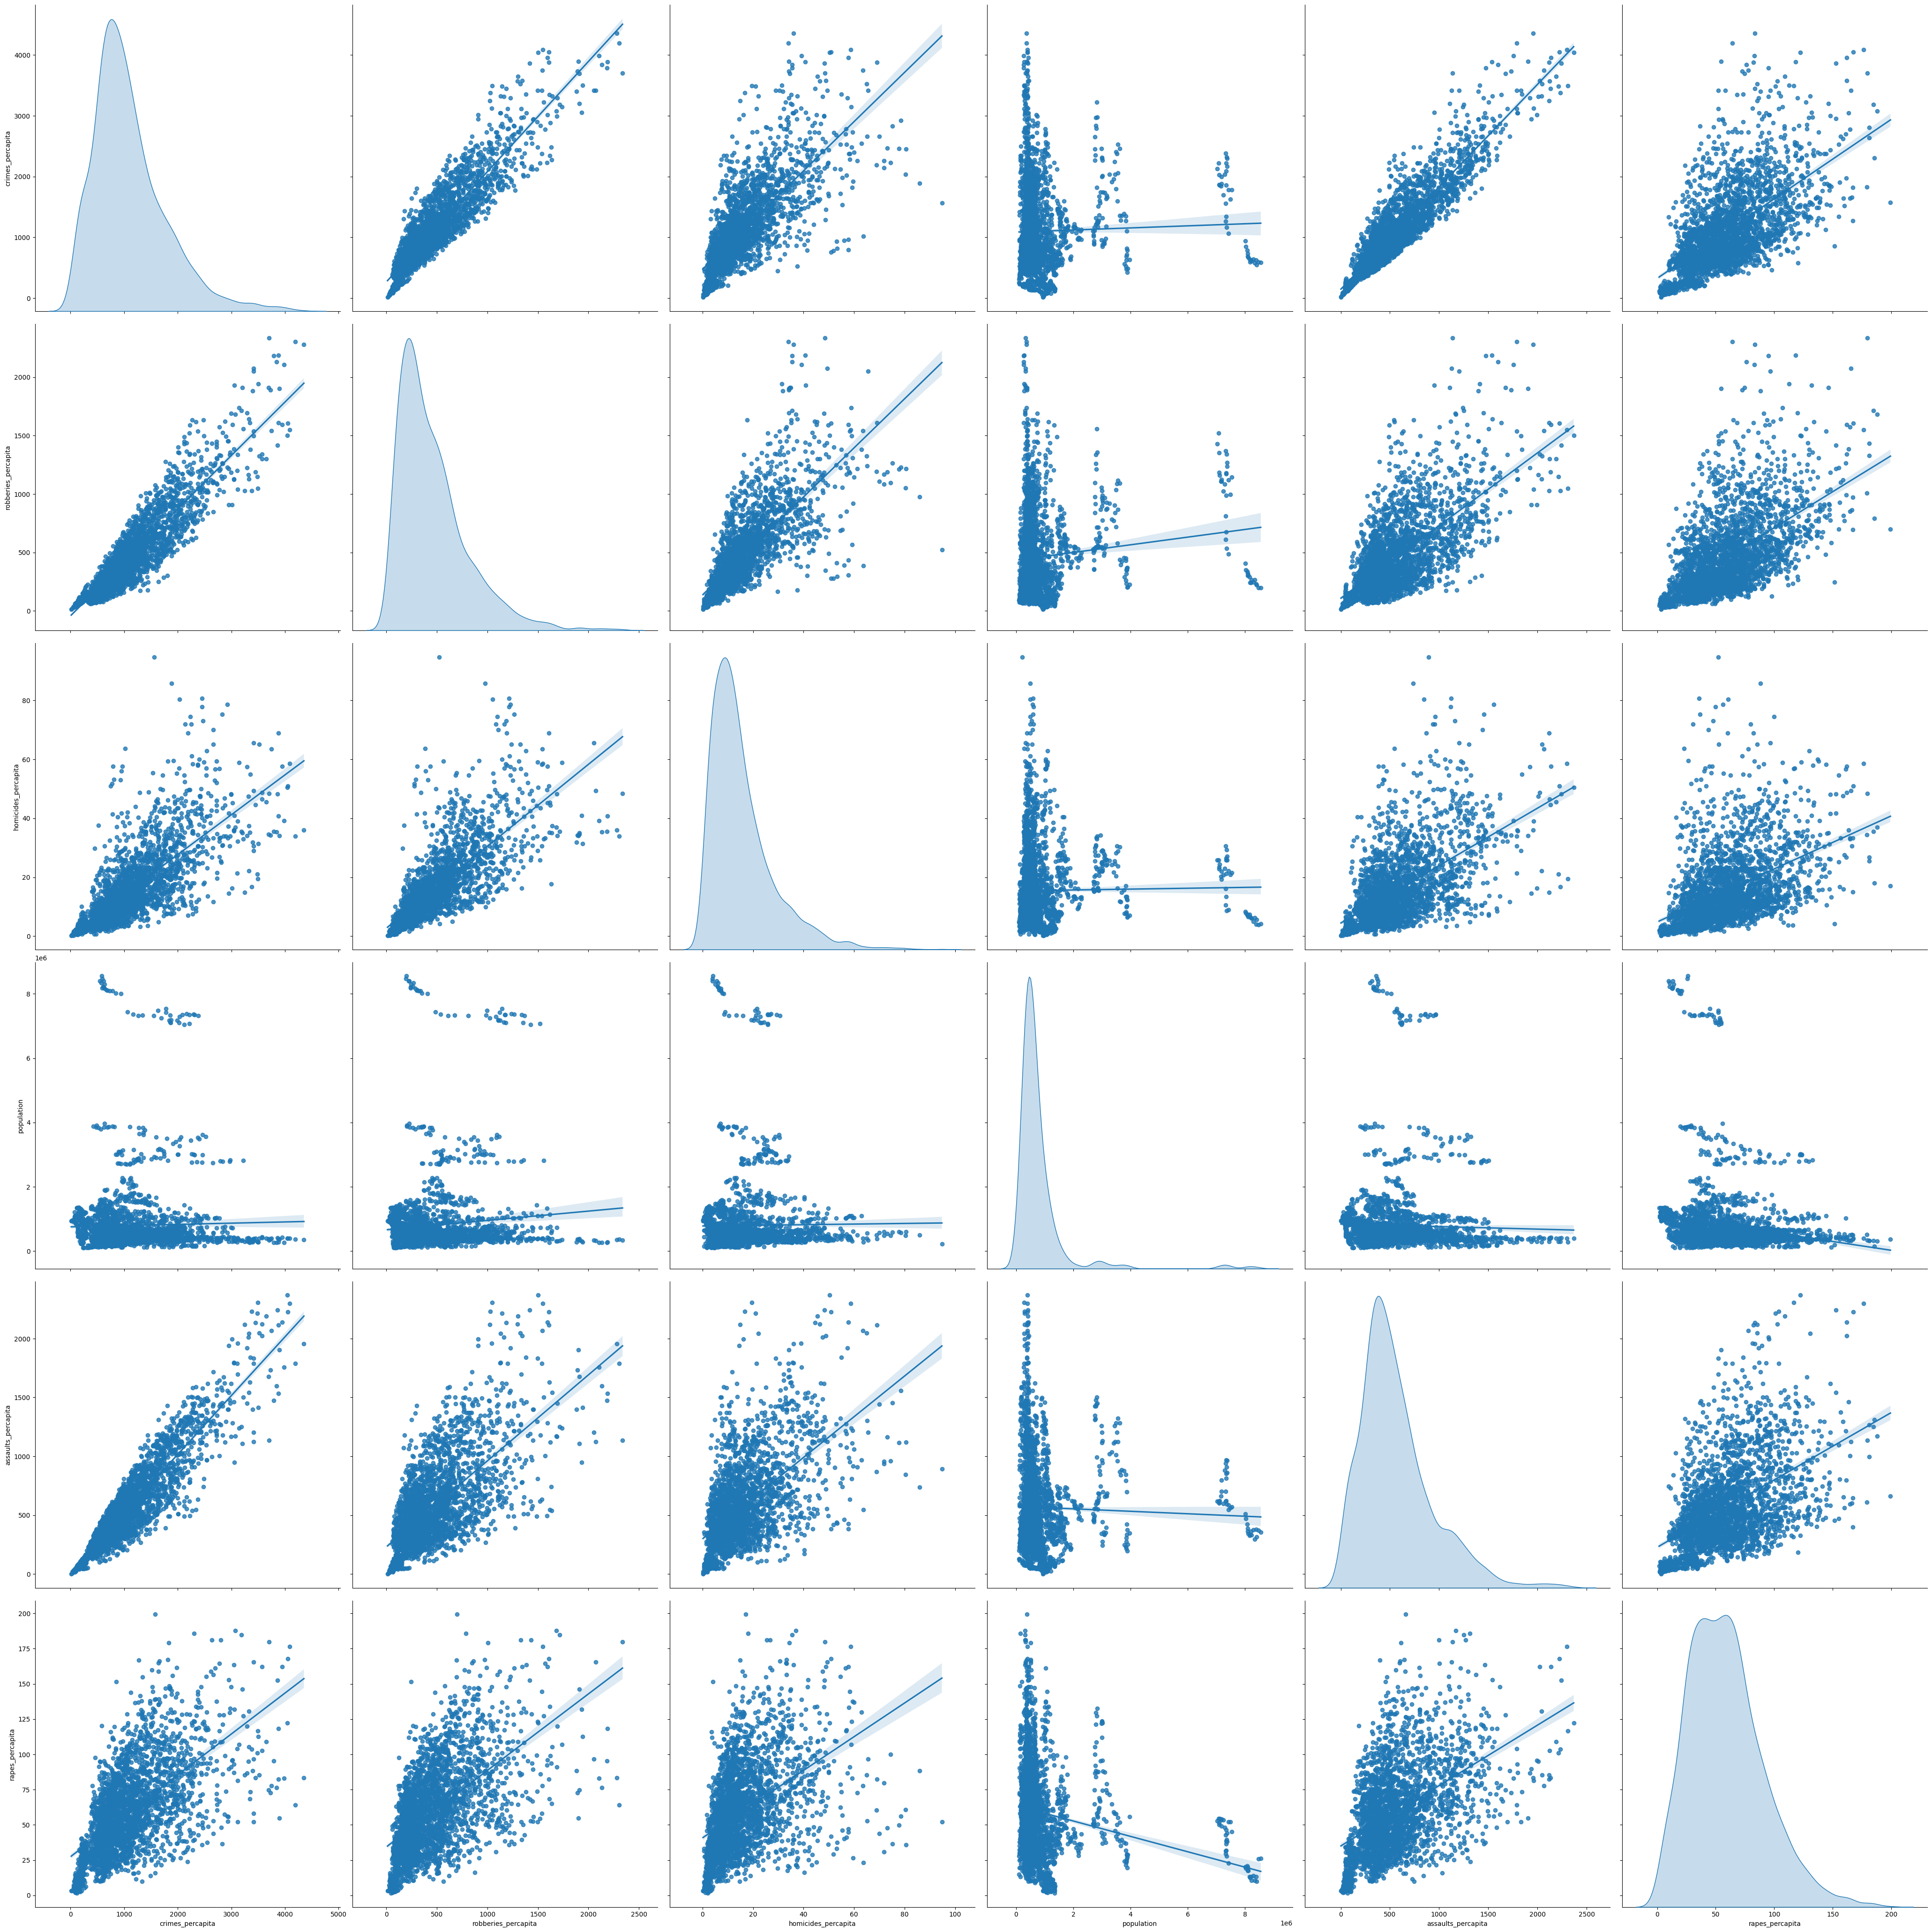

In [21]:
subset_data2 = crime_data[['crimes_percapita', 'robberies_percapita', 'homicides_percapita', 'population', 'assaults_percapita','rapes_percapita']]
sns.pairplot(subset_data2, height=7, kind='reg', diag_kind='kde')
plt.show()


interesting linear relationships.

Here's what we intend to focus on:

* Relationship of year and crime
* Relationship of states and crime
* Relationship of population and crime


## Year and its relationship with Crime

we'll go from broad to specific. let's look at the overall reported crime cases count by years reported using seaborn's `lineplot` to get a good look at the numbers.

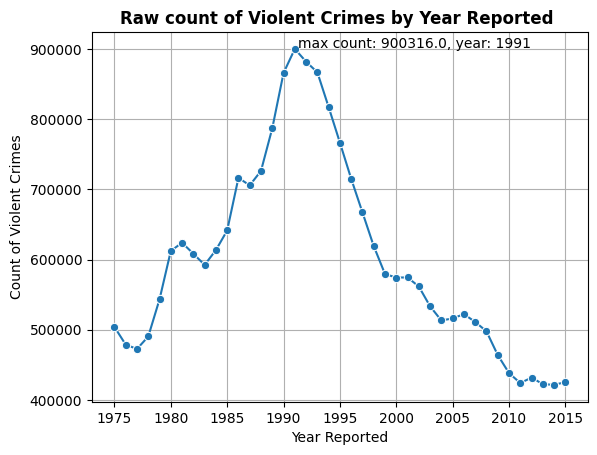

In [22]:
#prepare the df for the plot
crime_count = crime_data.groupby('report_year')['violent_crimes'].sum().reset_index()


#make the variables for labelling on the plot
max_vcount = np.max(crime_count['violent_crimes'])
max_year = crime_count.loc[crime_count['violent_crimes'].idxmax(), 'report_year']


#plot
sns.lineplot(data=crime_count, x='report_year', y='violent_crimes', marker='o')
plt.annotate(f'max count: {max_vcount}, year: {max_year}', (max_year,max_vcount), xytext=(max_year + 0.3, max_vcount + 1000))
plt.xlabel('Year Reported')
plt.ylabel('Count of Violent Crimes')
plt.title('Raw count of Violent Crimes by Year Reported ', fontweight='bold')
plt.grid(True)
plt.show()



The late 80s and early 90s, things are looking a little, *rough*. (The crime rate in the late 90s in the US must be studied.) Crimes did peak but they only seem to decline after that.

In [23]:
violence_raw_count = crime_data.groupby('state')['violent_crimes'].sum() \
.sort_values(ascending=False).head(10)

violence_raw_count

state
NY    4590104.0
CA    3990220.0
TX    2209217.0
IL    1960886.0
FL    1503422.0
MD    1136606.0
PA     921855.0
MI     918003.0
MO     691160.0
OH     670595.0
Name: violent_crimes, dtype: float64

In [24]:
violence_count_per_capita = crime_data.groupby(['state', 'report_year'])['crimes_percapita']\
.mean().reset_index().sort_values(by=['crimes_percapita'], ascending=False).head(20)


In [25]:
#write a function to make interactive plots using plotly express
#for the sake of efficiency.

def plot_line(x, y, df):
    grouped_data = df.groupby(x)[y].sum().reset_index()
    #x = grouping factor
    #y = column that will be aggregated on
    fig = px.line(grouped_data, 
                  x=x, 
                  y=y,
                  labels={'report_year': 'Year', y: f'Number of {y}'},
                  markers=True,
                  title = f'Count of {y} over reported years',
                  width=800, height=600)
    fig.show()


In [26]:
p1 = plot_line('report_year','assaults',crime_data)
p1

### Observation:
There doesn’t seem to be a sharp peak but the numbers for reported **assault** cases are the highest between **1990 and 1995** after which the cases only drop.

In [27]:
p2 = plot_line('report_year','rapes',crime_data)
p2


### Observation:
We almost observe two peaks from **1985 to 1990**. The counts of reported **rape** cases drastically dropped by 2010 after which they sharply rise.

In [28]:
p3 = plot_line('report_year','homicides',crime_data)
p3

### Observation:
The reported cases of **homicide** peaked in **1991** after which they only seem to decline.


In [29]:
p4 = plot_line('report_year','robberies',crime_data)
p4

### Observation:
The reported cases for **robberies** peaked in **1991** after which they only seem to decline.

were we to infer from this alone, we would say the crime rates, especially in the ealry 90s was *outrageously high* relative to the early and later 2000s. Why?



After looking up, i've gathered possible topics you could dig into if you wanted to know more about it and they're as follows:

* The great recession of 90s
* The crack cocaine epidemic
* Gang Homicide Trends in the Late 90s




## States and their relationship with crime

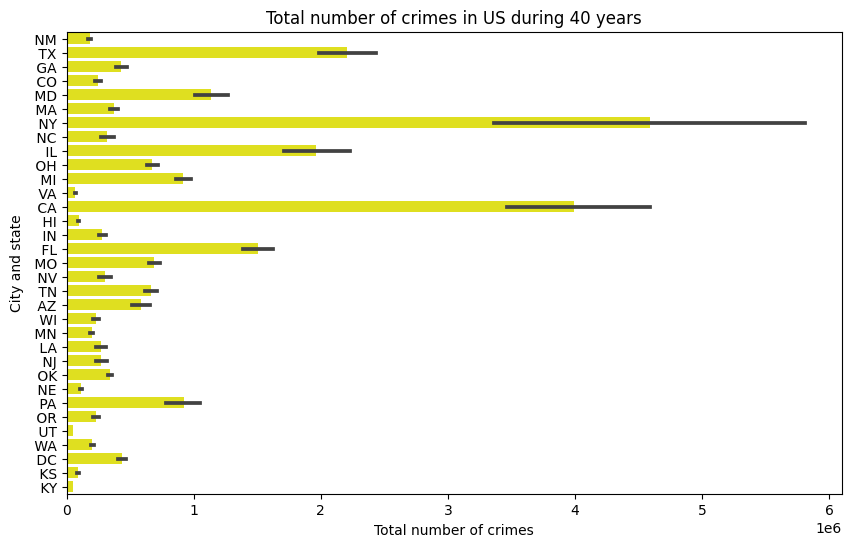

In [30]:
#plot total crime over states
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='violent_crimes', 
                 y='state', 
                 estimator=sum,
                 data=crime_data,
                 color='yellow')

#Set plot title and axis labels
ax.set_title('Total number of crimes in US during 40 years')
ax.set_xlabel('Total number of crimes')
ax.set_ylabel('City and state')

plt.show()


The states that stand out are:
1. New York
2. California
3. Texas
4. Illinois
5. Florida
6. Maryland


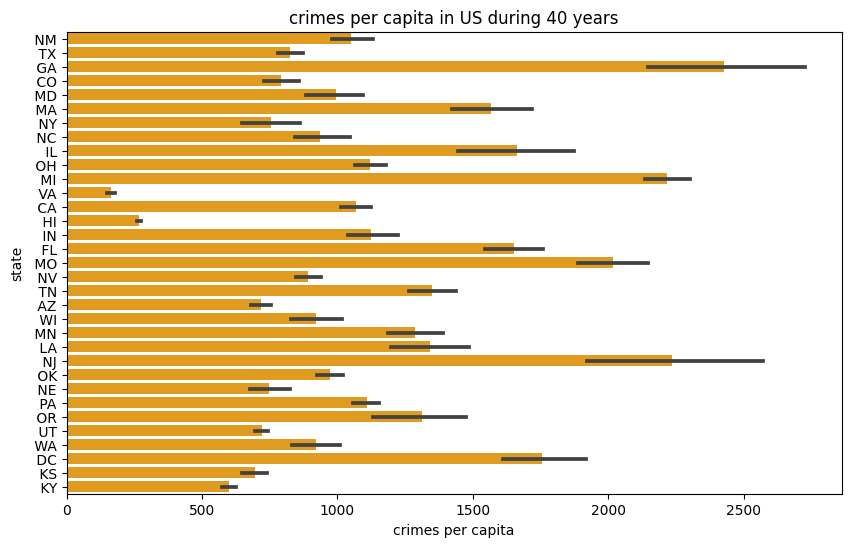

In [31]:
#plot crime per capita and states
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='crimes_percapita', 
                 y='state', 
                 data=crime_data,
                 color='orange')

# Set plot title and axis labels
ax.set_title('crimes per capita in US during 40 years')
ax.set_xlabel('crimes per capita')
ax.set_ylabel('state')

plt.show()


The concern with using crimes per capita is that it may be a standardized way of approach but it doesn't really help when the population sizes are vastly different. That is because New York could have the highest population (around 8 million) and the highest crime so the crime per capita would be expected to be high because the raw numbers of crimes are high too. clear. But the problem arises when we see states like Florida or Georgia that have surprisingly low population size (less than 2 million) and still have a higher crimes per capita than New York. 


for now, let's roll with what the over all raw counts are telling us because regardless of population, *crime is still crime*.


Narrow it down to top 7 states with the highest raw crime count

In [32]:
state_grouped = crime_data.groupby(['state'])['violent_crimes'].idxmax()
top_states = crime_data.loc[state_grouped].sort_values(by='violent_crimes',ascending=False)
top_7 = top_states.nlargest(7, 'violent_crimes')
top_7

report_year  population  violent_crimes  homicides   rapes  assaults  \
1076         1990   7322564.0        174542.0     2245.0  3126.0   68891.0   
1114         1991   2811478.0         90520.0      925.0  3575.0   42237.0   
1133         1991   3558316.0         89875.0     1027.0  1966.0   47104.0   
16           1975   1432444.0         30387.0      633.0  1424.0    7013.0   
1126         1991   1665756.0         26651.0      608.0  1213.0   10947.0   
1703         1999   1435382.0         23031.0      292.0   934.0   10701.0   
1248         1993    732968.0         21945.0      353.0   668.0    8548.0   

      robberies months_reported  crimes_percapita  homicides_percapita  \
1076   100280.0            12.0           2383.62                30.66   
1114    43783.0            12.0           3219.66                32.90   
1133    39778.0            12.0           2525.77                28.86   
16      21317.0            12.0           2121.34                44.19   
1126    13883.0            12.0           1599.93                36.50   
1703    11104.0            12.0           1604.52                20.34   
1248    12376.0            12.0           2993.99                48.16   

      rapes_percapita  assaults_percapita  robberies_percapita           city  \
1076            42.69              940.80              1369.47  New York City   
1114           127.16             1502.31              1557.29        Chicago   
1133            55.25             1323.77              1117.89    Los Angeles   
16              99.41              489.58              1488.16        Detroit   
1126            72.82              657.18               833.44        Houston   
1703            65.07              745.52               773.59   Philadelphia   
1248            91.14             1166.22              1688.48      Baltimore   

     state  
1076    NY  
1114    IL  
1133    CA  
16      MI  
1126    TX  
1703    PA  
1248    MD

In [33]:
# Plotting the total crimes for each state, broken down by different types of crimes
fig1 = px.bar(top_7, x='state', y=['robberies', 'assaults', 'rapes', 'homicides'],
             title='Total Crimes by State',
             labels={'value': 'Count of Crimes', 'variable': 'Type of Crime', 'State': 'State'},
             barmode='group')  # Use 'group' mode to group bars by state

fig1.show()

# Plotting the total crimes for each city, broken down by different types of crimes
fig2 = px.bar(top_7, x='city', y=['robberies', 'assaults', 'rapes', 'homicides'],
             title='Total Crimes by City',
             labels={'value': 'Count of Crimes', 'variable': 'Type of Crime', 'city': 'city'},
             barmode='group')  # Use 'group' mode to group bars by state

fig2.show()


From this graph, the trend seems to be of **robberies** being the highest of all other types of crime, except for california, where assaults are more prevelant than robberies, and homicide and rapes the least common.

Let's look at how states have been doing for 40 years

In [34]:
#group total crimes based on state and year
group_vcrime = crime_data.groupby(['report_year','state'])['violent_crimes'].sum().reset_index()\
.sort_values(by=['report_year','violent_crimes'], ascending=[True, False])
group_vcrime.head(20)


report_year state  violent_crimes
21         1975    NY        137489.0
1          1975    CA         67951.0
7          1975    IL         37160.0
13         1975    MI         30387.0
27         1975    TX         25851.0
12         1975    MD         22459.0
4          1975    FL         21778.0
25         1975    PA         21299.0
22         1975    OH         17961.0
15         1975    MO         16635.0
3          1975    DC         12704.0
11         1975    MA         11386.0
26         1975    TN          8587.0
5          1975    GA          8033.0
18         1975    NJ          7136.0
0          1975    AZ          6726.0
10         1975    LA          5993.0
2          1975    CO          5571.0
8          1975    IN          4655.0
23         1975    OK          4434.0

In [35]:
#plot
fig3 = px.line(group_vcrime, 
                x='report_year', 
                y='violent_crimes', color='state',
                labels={'report_year': 'Year', 'state': 'Total number of Crimes'},
                title='Total Number of crimes during 40 years',width=800, height=600)
fig3.show()

It is nice to see things have only calmed down.

## Population and its relationship with crime

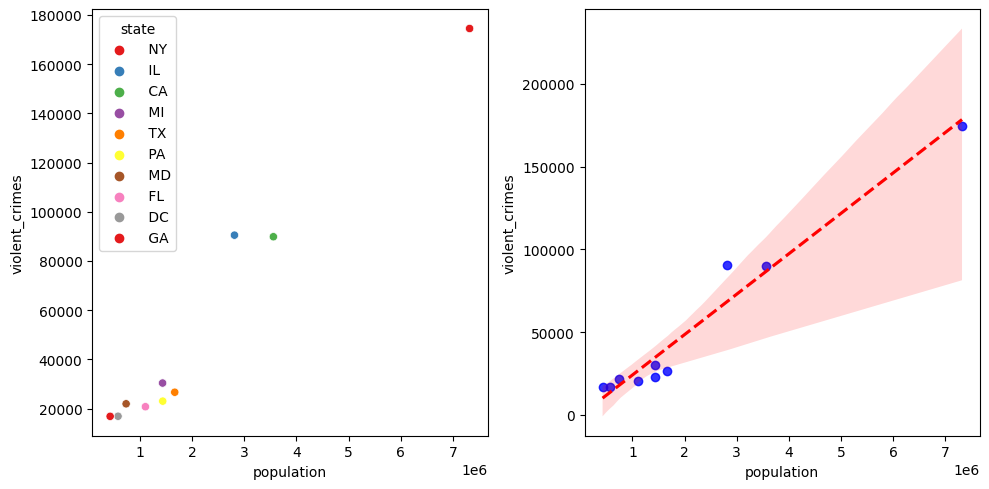

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x='population',
                y='violent_crimes',
                hue='state',
                data=top_states.nlargest(10,'violent_crimes'),
                ax=ax[0],
                palette='Set1')

sns.regplot(x='population', 
            y='violent_crimes', 
            data=top_states.nlargest(10,'violent_crimes'),
            scatter_kws={'color': 'blue'},  # Set the color of the scatterplot points
            line_kws={'color': 'red', 'linestyle':'--'},
            ax=ax[1]) 
            
plt.tight_layout()   
plt.show()

In [37]:
#new_df = crime_data.groupby('state')[['violent_crimes','population']].sum().reset_index()
fig4 = px.scatter(crime_data, x='population', y='violent_crimes', 
                 color='state',
                 size='population',
                 title='Relationship between crimes and population size'
                 )
fig4.show()


New York seems to be an outlier; in terms of population size and in terms of crime also.
But really, it makes sense: *More people, More oppurtunities, More crime.*

In [38]:
#new_df = crime_data.groupby('state')[['violent_crimes','population']].sum().reset_index()
fig5 = px.scatter(crime_data, x='population', y='crimes_percapita', 
                 color='state',
                 size='population',
                 title='Relationship between crimes per capita and population size'
                 )
fig5.show()


In [39]:
crime_data.select_dtypes(include=np.number).columns

Index(['report_year', 'population', 'violent_crimes', 'homicides', 'rapes',
       'assaults', 'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [40]:
corr_columns = crime_data[['report_year', 'population', 'violent_crimes', 'homicides', 'rapes',
       'assaults', 'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita']]

In [41]:
corr_data = corr_columns.corr()
corr_data


report_year  population  violent_crimes  homicides  \
report_year             1.000000    0.066882       -0.051903  -0.102583   
population              0.066882    1.000000        0.843667   0.777800   
violent_crimes         -0.051903    0.843667        1.000000   0.944648   
homicides              -0.102583    0.777800        0.944648   1.000000   
rapes                  -0.107089    0.751708        0.886098   0.882885   
assaults                0.010825    0.844437        0.969106   0.890391   
robberies              -0.095503    0.805549        0.980196   0.941084   
crimes_percapita       -0.136371    0.025491        0.350830   0.373367   
homicides_percapita    -0.162046    0.012048        0.256289   0.440864   
rapes_percapita        -0.294272   -0.172972        0.072649   0.110868   
assaults_percapita     -0.006686   -0.028732        0.260434   0.241462   
robberies_percapita    -0.230609    0.097636        0.399725   0.454831   

                        rapes  assaults  robberies  crimes_percapita  \
report_year         -0.107089  0.010825  -0.095503         -0.136371   
population           0.751708  0.844437   0.805549          0.025491   
violent_crimes       0.886098  0.969106   0.980196          0.350830   
homicides            0.882885  0.890391   0.941084          0.373367   
rapes                1.000000  0.856423   0.857417          0.334725   
assaults             0.856423  1.000000   0.901592          0.368460   
robberies            0.857417  0.901592   1.000000          0.318625   
crimes_percapita     0.334725  0.368460   0.318625          1.000000   
homicides_percapita  0.282014  0.238651   0.251340          0.740365   
rapes_percapita      0.294753  0.055954   0.069094          0.616199   
assaults_percapita   0.213567  0.335178   0.189600          0.917375   
robberies_percapita  0.396702  0.356022   0.412915          0.910984   

                     homicides_percapita  rapes_percapita  assaults_percapita  \
report_year                    -0.162046        -0.294272           -0.006686   
population                      0.012048        -0.172972           -0.028732   
violent_crimes                  0.256289         0.072649            0.260434   
homicides                       0.440864         0.110868            0.241462   
rapes                           0.282014         0.294753            0.213567   
assaults                        0.238651         0.055954            0.335178   
robberies                       0.251340         0.069094            0.189600   
crimes_percapita                0.740365         0.616199            0.917375   
homicides_percapita             1.000000         0.463952            0.580562   
rapes_percapita                 0.463952         1.000000            0.495246   
assaults_percapita              0.580562         0.495246            1.000000   
robberies_percapita             0.764174         0.578789            0.674204   

                     robberies_percapita  
report_year                    -0.230609  
population                      0.097636  
violent_crimes                  0.399725  
homicides                       0.454831  
rapes                           0.396702  
assaults                        0.356022  
robberies                       0.412915  
crimes_percapita                0.910984  
homicides_percapita             0.764174  
rapes_percapita                 0.578789  
assaults_percapita              0.674204  
robberies_percapita             1.000000

<Axes: >

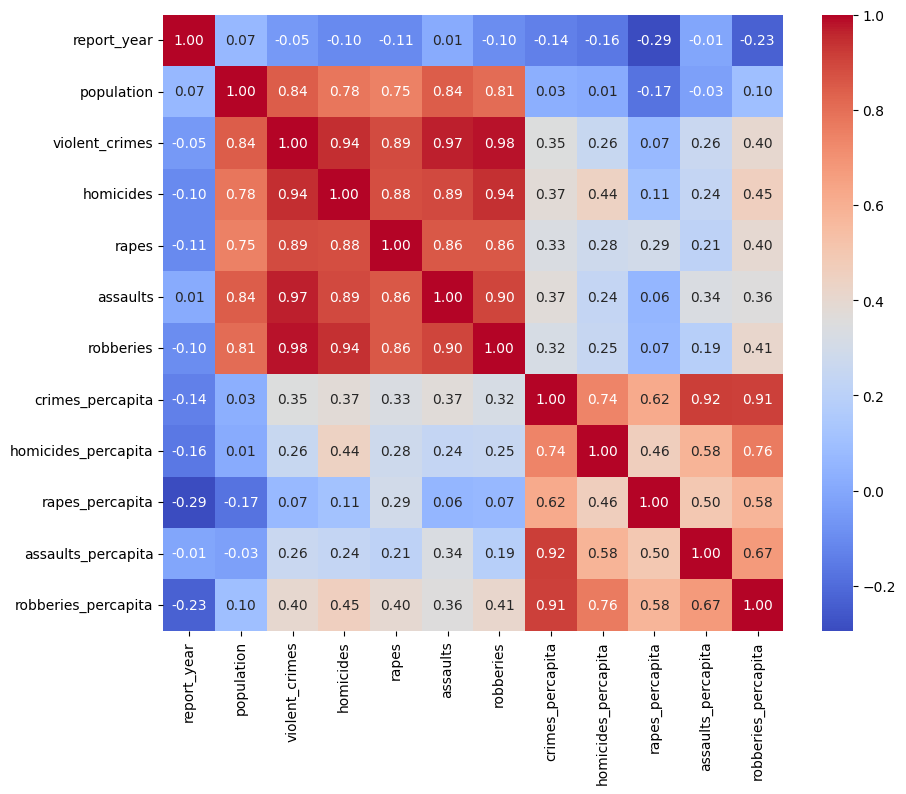

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_data, annot=True, fmt=".2f",cmap='coolwarm', ax=ax)

What i'm interested is in relationship of population and crimes. let's filter.

In [43]:
high_pos = corr_data[(corr_data > 0.75) & (corr_data != 1)]
high_pos

report_year  population  violent_crimes  homicides  \
report_year                  NaN         NaN             NaN        NaN   
population                   NaN         NaN        0.843667   0.777800   
violent_crimes               NaN    0.843667             NaN   0.944648   
homicides                    NaN    0.777800        0.944648        NaN   
rapes                        NaN    0.751708        0.886098   0.882885   
assaults                     NaN    0.844437        0.969106   0.890391   
robberies                    NaN    0.805549        0.980196   0.941084   
crimes_percapita             NaN         NaN             NaN        NaN   
homicides_percapita          NaN         NaN             NaN        NaN   
rapes_percapita              NaN         NaN             NaN        NaN   
assaults_percapita           NaN         NaN             NaN        NaN   
robberies_percapita          NaN         NaN             NaN        NaN   

                        rapes  assaults  robberies  crimes_percapita  \
report_year               NaN       NaN        NaN               NaN   
population           0.751708  0.844437   0.805549               NaN   
violent_crimes       0.886098  0.969106   0.980196               NaN   
homicides            0.882885  0.890391   0.941084               NaN   
rapes                     NaN  0.856423   0.857417               NaN   
assaults             0.856423       NaN   0.901592               NaN   
robberies            0.857417  0.901592        NaN               NaN   
crimes_percapita          NaN       NaN        NaN               NaN   
homicides_percapita       NaN       NaN        NaN               NaN   
rapes_percapita           NaN       NaN        NaN               NaN   
assaults_percapita        NaN       NaN        NaN          0.917375   
robberies_percapita       NaN       NaN        NaN          0.910984   

                     homicides_percapita  rapes_percapita  assaults_percapita  \
report_year                          NaN              NaN                 NaN   
population                           NaN              NaN                 NaN   
violent_crimes                       NaN              NaN                 NaN   
homicides                            NaN              NaN                 NaN   
rapes                                NaN              NaN                 NaN   
assaults                             NaN              NaN                 NaN   
robberies                            NaN              NaN                 NaN   
crimes_percapita                     NaN              NaN            0.917375   
homicides_percapita                  NaN              NaN                 NaN   
rapes_percapita                      NaN              NaN                 NaN   
assaults_percapita                   NaN              NaN                 NaN   
robberies_percapita             0.764174              NaN                 NaN   

                     robberies_percapita  
report_year                          NaN  
population                           NaN  
violent_crimes                       NaN  
homicides                            NaN  
rapes                                NaN  
assaults                             NaN  
robberies                            NaN  
crimes_percapita                0.910984  
homicides_percapita             0.764174  
rapes_percapita                      NaN  
assaults_percapita                   NaN  
robberies_percapita                  NaN

As we can tell from the correlation coefficient's (r) values pictured through the heatmap, **number of crimes and population size seem to have a strongly linear relationship** with one another, indicating that, *as population increases, so does crime.*
Especially robberies and assaults- which makes sense even intuitively. Don't we generally expect to get robbed in a busy area?


### hoping to capture the nuances of the relationship betwewen population and crime

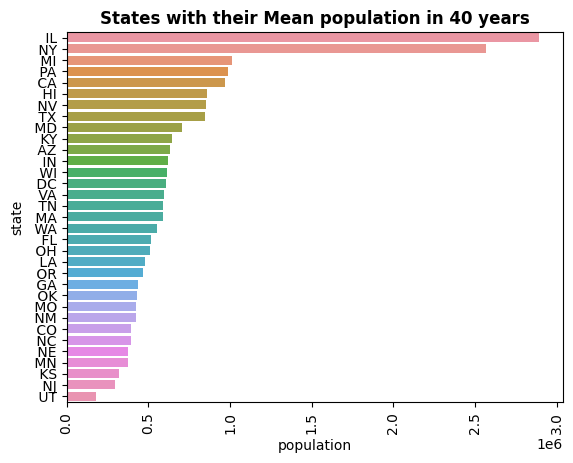

In [44]:
mean_pop = crime_data.groupby('state')['population'].mean() \
.reset_index().sort_values(by=['population'], ascending=False)

sns.barplot(mean_pop, y='state', x='population')
plt.title('States with their Mean population in 40 years', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

The population sizes are rather gradual. Apart from outliers-- **Illinois and New York**, everything else seems to be in line.

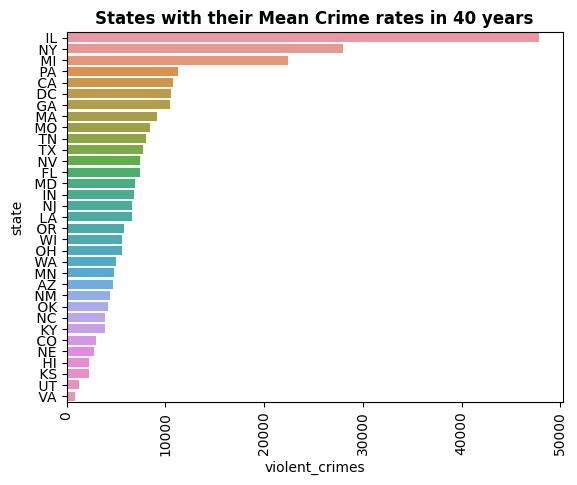

In [45]:
mean_crime = crime_data.groupby('state')['violent_crimes'].mean() \
.reset_index().sort_values(by=['violent_crimes'], ascending=False)

sns.barplot(mean_crime, y='state', x='violent_crimes')
plt.title('States with their Mean Crime rates in 40 years', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

**Illinois and New York** on the TOP. Even still, let's keep digging.

In [46]:
mean_df = pd.merge(mean_pop, mean_crime, on='state')
mean_df.sort_values(by=['population'], ascending=False)


state    population  violent_crimes
0     IL  2.889441e+06    47826.487805
1     NY  2.565573e+06    27988.439024
2     MI  1.010635e+06    22390.317073
3     PA  9.846848e+05    11242.134146
4     CA  9.723705e+05    10813.604336
5     HI  8.608482e+05     2311.512195
6     NV  8.559471e+05     7437.048780
7     TX  8.460936e+05     7697.620209
8     MD  7.075066e+05     6973.042945
9     KY  6.465003e+05     3878.153846
10    AZ  6.329883e+05     4737.934959
11    IN  6.206171e+05     6817.243902
12    WI  6.154651e+05     5610.975610
13    DC  6.065186e+05    10583.829268
14    VA  5.988558e+05      830.987805
15    TN  5.894650e+05     8088.817073
16    MA  5.882791e+05     9125.268293
17    WA  5.504198e+05     4976.804878
18    FL  5.156761e+05     7406.019704
19    OH  5.104628e+05     5588.291667
20    LA  4.803500e+05     6596.829268
21    OR  4.695563e+05     5779.125000
22    GA  4.394929e+05    10465.121951
23    OK  4.302107e+05     4176.073171
24    MO  4.244637e+05     8428.780488
25    NM  4.234810e+05     4419.073171
26    CO  3.938451e+05     3019.707317
27    NC  3.932321e+05     3882.073171
28    NE  3.781422e+05     2784.707317
29    MN  3.761864e+05     4810.902439
30    KS  3.222000e+05     2280.439024
31    NJ  2.958818e+05     6676.926829
32    UT  1.774550e+05     1277.780488

In [47]:
fig6 = px.scatter(mean_df, x='population', y='violent_crimes', 
                 color='state',
                 size='population',
                 title='Relationship between crimes and population size'
                 )
fig6.show()

So far the trend seems to look the same, but-- let's ditch the outliers (we've heard you enough) to focus more on the general states that can't seem to make an impression because of those giants.

In [48]:
population_min = 0
population_max = 1.2e6  # 1.2 million

filtered_df = mean_df[(mean_df['population'] >= population_min) & (mean_df['population'] <= population_max)]


fig7 = px.scatter(filtered_df, x='population', y='violent_crimes', color='state', size='population',
                 title='Relationship between crimes and population size (Excluding Outliers)')
fig7.show()
